In [2]:

import pandas as pd
import numpy as np
import cv2
import os
from ultralytics import YOLO

C:\Users\JaoPC\AppData\Local\Temp\ipykernel_21936\982520029.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
model_pth = r'C:\Repos\TCC-CDIA\models\yolo\yolov8n.pt'

In [6]:
#fine tuning model
model = YOLO(model_pth)
model.train(data=r'C:\Repos\TCC-CDIA\notebooks\data\Merged Datasets\data.yaml', 
            epochs = 10, 
            amp=False,
            freeze=10,
             lr0=0.001)
valid_results = model.val()
print(valid_results)

New https://pypi.org/project/ultralytics/8.2.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.14 🚀 Python-3.9.6 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1660, 6144MiB)
engine\trainer: task=detect, mode=train, model=C:\Repos\TCC-CDIA\models\yolo\yolov8n.pt, data=C:\Repos\TCC-CDIA\notebooks\data\Merged Datasets\data.yaml, epochs=10, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms

train: Scanning C:\Repos\TCC-CDIA\notebooks\data\Merged Datasets\train-merged\labels... 117265 images, 1022 backgrounds, 0 corrupt: 100%|██████████| 118287/118287 [03:33<00:00, 554.82it/s]

train: WARNING ⚠️ C:\Repos\TCC-CDIA\notebooks\data\Merged Datasets\train-merged\images\000000099844.jpg: 2 duplicate labels removed
train: WARNING ⚠️ C:\Repos\TCC-CDIA\notebooks\data\Merged Datasets\train-merged\images\000000201706.jpg: 1 duplicate labels removed
train: WARNING ⚠️ C:\Repos\TCC-CDIA\notebooks\data\Merged Datasets\train-merged\images\000000214087.jpg: 1 duplicate labels removed
train: WARNING ⚠️ C:\Repos\TCC-CDIA\notebooks\data\Merged Datasets\train-merged\images\000000522365.jpg: 1 duplicate labels removed


train: New cache created: C:\Repos\TCC-CDIA\notebooks\data\Merged Datasets\train-merged\labels.cache


val: Scanning C:\Repos\TCC-CDIA\notebooks\data\Merged Datasets\val-merged\labels... 5015 images, 49 backgrounds, 1 corrupt: 100%|██████████| 5064/5064 [00:10<00:00, 470.07it/s]

val: WARNING ⚠️ C:\Repos\TCC-CDIA\notebooks\data\Merged Datasets\val-merged\images\generated_image_855_jpg.rf.32a866da9415fe6f66c1ef4166f849c6.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      2.228      2.0809      2.3245      2.5847      3.1763      1.8127      4.6943      3.9293      4.3251      2.8849      1.3498      1.3877      2.0606      1.0766      1.2448      2.5511      2.7798      1.8798      4.0575      1.4084      1.2504      1.3427      4.7752      1.4475      1.2432      1.3343
      2.4815      1.6796      1.9446      2.4961      1.9414      4.9922      3.5703]


val: New cache created: C:\Repos\TCC-CDIA\notebooks\data\Merged Datasets\val-merged\labels.cache
Plotting labels to c:\Repos\TCC-CDIA\runs\detect\train5\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to c:\Repos\TCC-CDIA\runs\detect\train5
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       2.7G      1.264      2.521      1.277        124        640: 100%|██████████| 7393/7393 [39:11<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  70%|███████   | 112/159 [01:19<00:38,  1.22it/s]c:\Repos\TCC-CDIA\.venv\lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [01:54<00:00,  1.38it/s]


                   all       5063      36829      0.183      0.231        0.1     0.0601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.81G      1.318      1.929      1.321         75        640: 100%|██████████| 7393/7393 [42:01<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [02:08<00:00,  1.24it/s]


                   all       5063      36829      0.184      0.254      0.111     0.0669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.78G      1.338      1.738      1.339         83        640: 100%|██████████| 7393/7393 [39:48<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [01:48<00:00,  1.47it/s]


                   all       5063      36829       0.19      0.279      0.114     0.0704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.79G      1.321      1.615      1.331        123        640: 100%|██████████| 7393/7393 [40:05<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [01:57<00:00,  1.36it/s]


                   all       5063      36829      0.192      0.272      0.112     0.0698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.76G      1.293      1.545      1.312        100        640: 100%|██████████| 7393/7393 [34:18<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [01:54<00:00,  1.39it/s]


                   all       5063      36829      0.184      0.285      0.114     0.0718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.76G      1.266      1.494      1.292        135        640: 100%|██████████| 7393/7393 [40:30<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [01:44<00:00,  1.52it/s]


                   all       5063      36829      0.185      0.288      0.114     0.0716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         3G      1.244      1.455      1.277        102        640: 100%|██████████| 7393/7393 [35:51<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [01:42<00:00,  1.55it/s]


                   all       5063      36829      0.176      0.306      0.113     0.0711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.75G      1.227      1.422      1.264        191        640: 100%|██████████| 7393/7393 [38:56<00:00,  3.16it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [01:54<00:00,  1.39it/s]


                   all       5063      36829      0.176       0.31      0.112     0.0709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.76G       1.21       1.39      1.253         89        640: 100%|██████████| 7393/7393 [39:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [01:54<00:00,  1.39it/s]


                   all       5063      36829      0.176       0.31      0.113      0.071

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.81G      1.193      1.361      1.241         74        640: 100%|██████████| 7393/7393 [40:03<00:00,  3.08it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [01:52<00:00,  1.41it/s]


                   all       5063      36829      0.178      0.305      0.113     0.0712

10 epochs completed in 6.857 hours.
Optimizer stripped from c:\Repos\TCC-CDIA\runs\detect\train5\weights\last.pt, 6.7MB
Optimizer stripped from c:\Repos\TCC-CDIA\runs\detect\train5\weights\best.pt, 6.7MB

Validating c:\Repos\TCC-CDIA\runs\detect\train5\weights\best.pt...
Ultralytics YOLOv8.1.14 🚀 Python-3.9.6 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1660, 6144MiB)
Model summary (fused): 168 layers, 3252785 parameters, 0 gradients, 9.2 GFLOPs


c:\Repos\TCC-CDIA\.venv\lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|▏         | 2/159 [00:01<02:12,  1.18it/s]c:\Repos\TCC-CDIA\.venv\lib\site-packages\ultralytics\utils\plotting.py:778: RuntimeWarning: invalid value encountered in cast
  for j, box in enumerate(boxes.astype(np.int64).tolist()):
Exception in thread Thread-47:
OverflowError: Python int too large to convert to C long

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\JaoPC\AppData\Local\Programs\Python\Python39\

                   all       5063      36829      0.184      0.285      0.114     0.0718
                person       5063      11004      0.153      0.469      0.111     0.0647
               bicycle       5063        316      0.124      0.291     0.0719     0.0362
                   car       5063       1932      0.294      0.478      0.225       0.13
            motorcycle       5063        371     0.0988       0.34     0.0622     0.0308
              airplane       5063        143     0.0522      0.294     0.0525     0.0396
                   bus       5063        285     0.0498      0.256     0.0272     0.0192
                 train       5063        190     0.0212      0.147    0.00785    0.00496
                 truck       5063        415     0.0862      0.231     0.0491     0.0283
                  boat       5063        430      0.153      0.242     0.0788     0.0347
         traffic light       5063        700       0.29      0.287      0.162     0.0788
          fire hydran

val: Scanning C:\Repos\TCC-CDIA\notebooks\data\Merged Datasets\val-merged\labels.cache... 5015 images, 49 backgrounds, 1 corrupt: 100%|██████████| 5064/5064 [00:00<?, ?it/s]

val: WARNING ⚠️ C:\Repos\TCC-CDIA\notebooks\data\Merged Datasets\val-merged\images\generated_image_855_jpg.rf.32a866da9415fe6f66c1ef4166f849c6.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      2.228      2.0809      2.3245      2.5847      3.1763      1.8127      4.6943      3.9293      4.3251      2.8849      1.3498      1.3877      2.0606      1.0766      1.2448      2.5511      2.7798      1.8798      4.0575      1.4084      1.2504      1.3427      4.7752      1.4475      1.2432      1.3343
      2.4815      1.6796      1.9446      2.4961      1.9414      4.9922      3.5703]



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [01:13<00:00,  4.34it/s]


                   all       5063      36829      0.604      0.431      0.471      0.328
                person       5063      11004      0.764      0.622      0.712      0.478
               bicycle       5063        316      0.581      0.369       0.41      0.231
                   car       5063       1932      0.623      0.487       0.52      0.327
            motorcycle       5063        371      0.688      0.547      0.623      0.371
              airplane       5063        143      0.795      0.727      0.798      0.598
                   bus       5063        285      0.735      0.621      0.705      0.578
                 train       5063        190      0.778      0.732      0.787      0.587
                 truck       5063        415      0.546      0.335      0.409      0.267
                  boat       5063        430      0.557      0.258      0.345      0.178
         traffic light       5063        700      0.565      0.281      0.317      0.159
          fire hydran


image 1/1 c:\Repos\TCC-CDIA\notebooks\..\data\frames\images\2208_original.jpg: 384x640 6 cars, 1 bus, 1 truck, 6 traffic lights, 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 c:\Repos\TCC-CDIA\notebooks\..\data\frames\images\2208_original.jpg: 384x640 9 cars, 1 truck, 6 traffic lights, 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


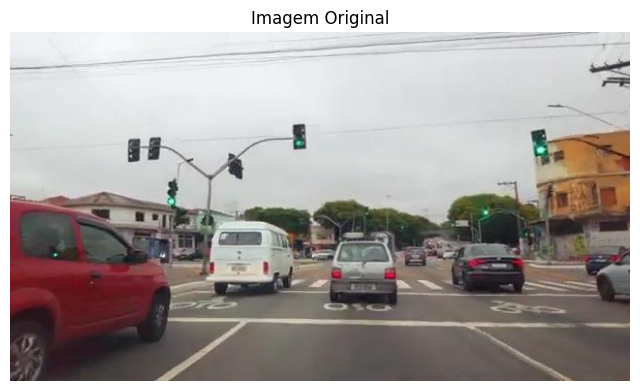

Confianças Modelo 1: {'Objeto 1 - traffic light': 0.79, 'Objeto 2 - car': 0.78, 'Objeto 3 - car': 0.77, 'Objeto 4 - car': 0.77, 'Objeto 5 - traffic light': 0.74, 'Objeto 6 - car': 0.72, 'Objeto 7 - traffic light': 0.72, 'Objeto 8 - traffic light': 0.65, 'Objeto 9 - car': 0.65, 'Objeto 10 - car': 0.65, 'Objeto 11 - truck': 0.6, 'Objeto 12 - traffic light': 0.51, 'Objeto 13 - bus': 0.44, 'Objeto 14 - traffic light': 0.38}
Confianças Modelo 2: {'Objeto 1 - car': 0.86, 'Objeto 2 - car': 0.84, 'Objeto 3 - traffic light': 0.82, 'Objeto 4 - car': 0.79, 'Objeto 5 - traffic light': 0.78, 'Objeto 6 - traffic light': 0.71, 'Objeto 7 - car': 0.65, 'Objeto 8 - car': 0.65, 'Objeto 9 - car': 0.62, 'Objeto 10 - truck': 0.62, 'Objeto 11 - traffic light': 0.59, 'Objeto 12 - traffic light': 0.51, 'Objeto 13 - car': 0.5, 'Objeto 14 - traffic light': 0.44, 'Objeto 15 - car': 0.4, 'Objeto 16 - car': 0.28}


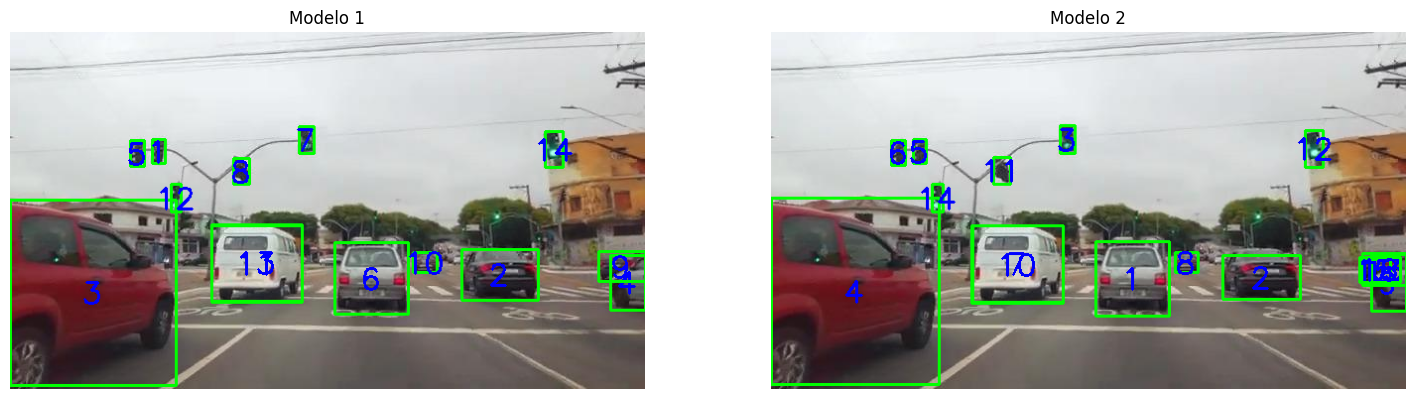

In [5]:
%matplotlib inline
import os
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

class PredPipe():
    def __init__(self, model1, model2):
        self.model1 = model1
        self.model2 = model2

    def predict_image(self, image_path):
        # Predict using the first YOLO model
        results1 = self.model1.predict(image_path)
        result1 = results1[0]
        
        # Predict using the second YOLO model
        results2 = self.model2.predict(image_path)
        result2 = results2[0]
        
        # Read the original image
        original_img = cv2.imread(image_path)
        
        # Read the image with detections for model 1
        img_with_detections1 = original_img.copy()
        
        # Desenhar boxes e números na imagem para o modelo 1
        for idx, box in enumerate(result1.boxes, start=1):
            class_id = result1.names[box.cls[0].item()]
            confidence = round(box.conf[0].item(), 2)
            cords = box.xyxy[0].tolist()
            cords = [round(x) for x in cords]
            # Calcular as coordenadas do centro da caixa delimitadora
            x_center = (cords[0] + cords[2]) // 2
            y_center = (cords[1] + cords[3]) // 2
            # Calcular o tamanho do texto para centralizá-lo na caixa
            (text_width, text_height), _ = cv2.getTextSize(str(idx), cv2.FONT_HERSHEY_SIMPLEX, 1, 2)
            text_x = x_center - text_width // 2
            text_y = y_center + text_height // 2
            # Desenhar o retângulo e o número do objeto
            cv2.rectangle(img_with_detections1, (cords[0], cords[1]), (cords[2], cords[3]), (0, 255, 0), 2)
            cv2.putText(img_with_detections1, str(idx), (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        
        # Read the image with detections for model 2
        img_with_detections2 = original_img.copy()
        
        # Desenhar boxes e números na imagem para o modelo 2
        for idx, box in enumerate(result2.boxes, start=1):
            class_id = result2.names[box.cls[0].item()]
            confidence = round(box.conf[0].item(), 2)
            cords = box.xyxy[0].tolist()
            cords = [round(x) for x in cords]
            # Calcular as coordenadas do centro da caixa delimitadora
            x_center = (cords[0] + cords[2]) // 2
            y_center = (cords[1] + cords[3]) // 2
            # Calcular o tamanho do texto para centralizá-lo na caixa
            (text_width, text_height), _ = cv2.getTextSize(str(idx), cv2.FONT_HERSHEY_SIMPLEX, 1, 2)
            text_x = x_center - text_width // 2
            text_y = y_center + text_height // 2
            # Desenhar o retângulo e o número do objeto
            cv2.rectangle(img_with_detections2, (cords[0], cords[1]), (cords[2], cords[3]), (0, 255, 0), 2)
            cv2.putText(img_with_detections2, str(idx), (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        
        # Exibir a imagem original
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
        plt.title('Imagem Original')
        plt.axis('off')
        plt.show()
        
        # Exibir as confianças dos modelos em formato de dicionário
        confidences1 = {f'Objeto {idx} - {result1.names[box.cls[0].item()]}': round(box.conf[0].item(), 2) for idx, box in enumerate(result1.boxes, start=1)}
        confidences2 = {f'Objeto {idx} - {result2.names[box.cls[0].item()]}': round(box.conf[0].item(), 2) for idx, box in enumerate(result2.boxes, start=1)}
        
        print("Confianças Modelo 1:", confidences1)
        print("Confianças Modelo 2:", confidences2)
        
        # Exibir as imagens com detecções dos modelos
        fig, axes = plt.subplots(1, 2, figsize=(18, 9))  # Ajustando o tamanho das imagens dos modelos
        
        # Exibir a imagem com detecções do modelo 1
        axes[0].imshow(cv2.cvtColor(img_with_detections1, cv2.COLOR_BGR2RGB))
        axes[0].set_title('Modelo 1')
        axes[0].axis('off')
        
        # Exibir a imagem com detecções do modelo 2
        axes[1].imshow(cv2.cvtColor(img_with_detections2, cv2.COLOR_BGR2RGB))
        axes[1].set_title('Modelo 2')
        axes[1].axis('off')
        
        plt.show()

# Exemplo de uso:
model1 = YOLO(r'C:\Repos\TCC-CDIA\notebooks\yolov8n.pt')  # Inicialize seu primeiro modelo YOLO aqui
model2 = YOLO(r'C:\Repos\TCC-CDIA\runs\detect\train5\weights\best.pt')  # Inicialize seu segundo modelo YOLO aqui
pipe = PredPipe(model1, model2)
image_path = "../data/frames/images/2208_original.jpg"
pipe.predict_image(image_path)


In [20]:
model1 = YOLO(model_pth)  # Inicialize seu primeiro modelo YOLO aqui
model2 = model  # Inicialize seu segundo modelo YOLO aqui
pipe = PredPipe(model1, model2)
image_path = "../data/frames/images/27_original.jpg"
pipe.predict_image(image_path)


image 1/1 c:\Repos\TCC-CDIA\notebooks\..\data\frames\images\27_original.jpg: 384x640 7 cars, 1 bus, 12.0ms
Speed: 3.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 c:\Repos\TCC-CDIA\notebooks\..\data\frames\images\27_original.jpg: 384x640 1 traffic light, 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


<Figure size 800x800 with 1 Axes>

Confianças Modelo 1: {'Objeto 1 - car': 0.88, 'Objeto 2 - car': 0.8, 'Objeto 3 - car': 0.7, 'Objeto 4 - bus': 0.68, 'Objeto 5 - car': 0.51, 'Objeto 6 - car': 0.46, 'Objeto 7 - car': 0.3, 'Objeto 8 - car': 0.26}
Confianças Modelo 2: {'Objeto 1 - traffic light': 0.84}


<Figure size 1800x900 with 2 Axes>

In [18]:
import torch
model = YOLO("../runs/detect/train9/weights/best.pt")
model.save('./models/yolo/yolo_FT_GAN.pt')


image 1/1 c:\Repos\TCC-CDIA\notebooks\..\data\frames\images\2430_original.jpg: 384x640 14 cars, 1 truck, 4 traffic lights, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 c:\Repos\TCC-CDIA\notebooks\..\data\frames\images\2430_original.jpg: 384x640 4 traffic lights, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


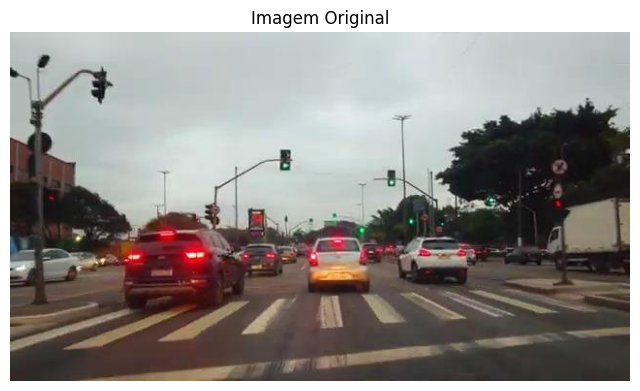

Confianças Modelo 1: {'Objeto 1 - car': 0.87, 'Objeto 2 - car': 0.83, 'Objeto 3 - car': 0.82, 'Objeto 4 - car': 0.82, 'Objeto 5 - car': 0.81, 'Objeto 6 - traffic light': 0.72, 'Objeto 7 - traffic light': 0.69, 'Objeto 8 - truck': 0.61, 'Objeto 9 - car': 0.61, 'Objeto 10 - car': 0.6, 'Objeto 11 - car': 0.49, 'Objeto 12 - car': 0.43, 'Objeto 13 - car': 0.42, 'Objeto 14 - car': 0.38, 'Objeto 15 - car': 0.35, 'Objeto 16 - traffic light': 0.34, 'Objeto 17 - car': 0.32, 'Objeto 18 - traffic light': 0.32, 'Objeto 19 - car': 0.25}
Confianças Modelo 2: {'Objeto 1 - traffic light': 0.79, 'Objeto 2 - traffic light': 0.75, 'Objeto 3 - traffic light': 0.48, 'Objeto 4 - traffic light': 0.4}


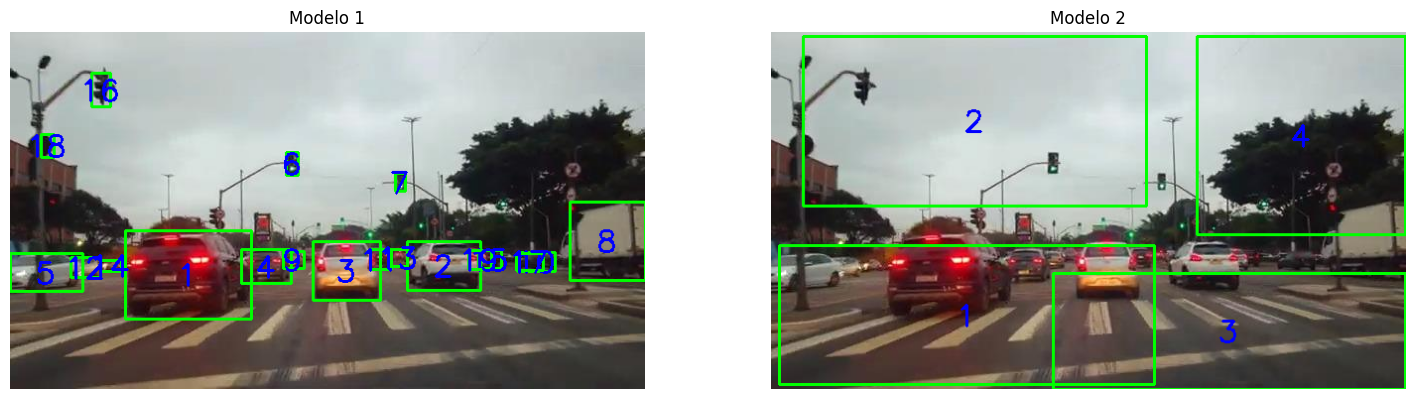

In [23]:
model1 = YOLO(r'C:\Repos\TCC-CDIA\notebooks\yolov8n.pt')  # Inicialize seu primeiro modelo YOLO aqui
model2 = YOLO(r'C:\Repos\TCC-CDIA\notebooks\models\yolo\yolo_FT_GAN.pt')  # Inicialize seu segundo modelo YOLO aqui
pipe = PredPipe(model1, model2)
image_path = "../data/frames/images/2430_original.jpg"
pipe.predict_image(image_path)